In [35]:
%reset -f
%matplotlib inline

In [36]:
import numpy as np
import pandas as pd
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [37]:
pd.options.display.float_format = "{:.4f}".format

In [38]:
train = pd.read_csv("data/mnist/train.csv", sep = ",")

In [39]:
x = train[train.columns[1:]].values / 255.0
y = train.label.values

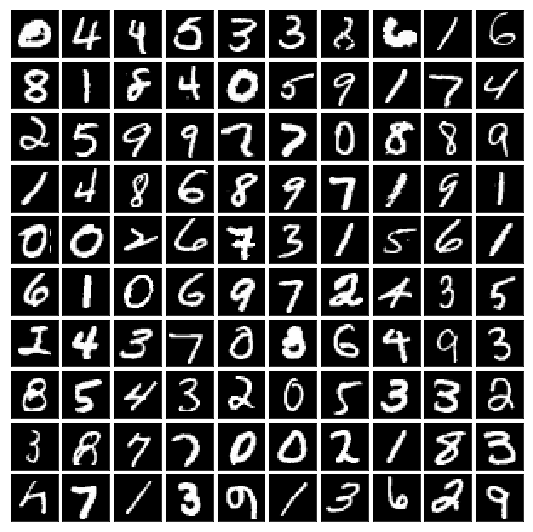

In [40]:
nrows = 10
ncols = 10

fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (7.5, 7.5))

for i in range(nrows):
    for j in range(ncols):
        k   = np.random.randint(0, 5000)
        img = x[k].reshape(28, 28)
        ax[i,j].imshow(img, cmap = "gray")
        ax[i,j].margins(0.0)

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

In [41]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 10.0)

In [42]:
model = sbbml.LogisticClassifier(
    alpha = 0.01, 
    iterations = 100, 
    normalize = False
)
model.fit(x_train, y_train)

In [43]:
y_prime = model.predict(x_test)
utils.accuracy(y_prime, y_test)

0.7769047619047619

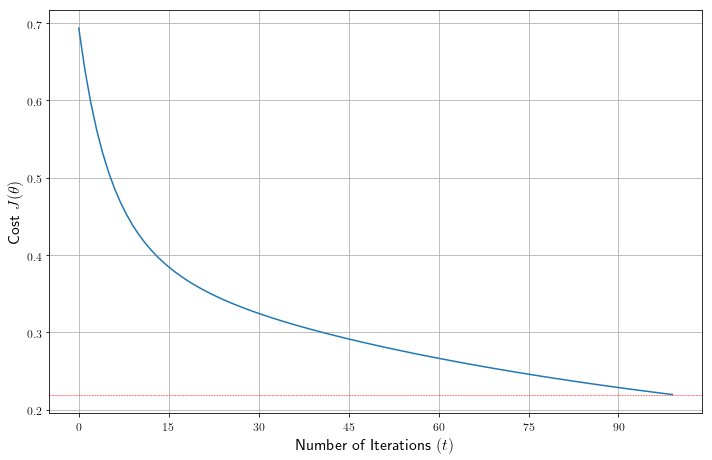

In [44]:
utils.plot_cost_function(cost = model.cost[0], width = 10.0, height = 6.5)

In [45]:
test = pd.read_csv("data/mnist/test.csv", sep = ",")
x_test = test.values / 255.0
y_prime = model.predict(x_test).flatten()

In [46]:
m = y_prime.shape[0]

with open("data/mnist/submission.csv", mode = "w") as f:
    f.write("ImageId,Label\n")
    for i in range(m):
        f.write(f"{i + 1},{int(y_prime[i])}\n")

In [47]:
pd.read_csv("data/mnist/submission.csv", sep = ",")

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,7
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
